# Tensors

##### Everything in PyTorch is based on tensor operations. A tensor is a multi-dimensional matrix containing elements of a single data type.
##### It's similar to a numpy nd array but here we also have gpu support 

In [1]:
import torch

In [3]:
# torch.empty(size): uninitialized
x = torch.empty(1)
print('empty(1)',x)
x = torch.empty(3) #vector
print('empty(3)',x)
x = torch.empty(2,3) #matrix
print('empty(2,3)',x)
x = torch.empty(2,2,3) #tensor, 3 dimensions
print('empty(2,2,3)',x)
#x = torch.empty(2,2,2,3) #tensor, 4 dimensions

empty(1) tensor([0.])
empty(3) tensor([0., 0., 0.])
empty(2,3) tensor([[0., 0., 0.],
        [0., 0., 0.]])
empty(2,2,3) tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [4]:
#torch.rand(size) - random numbers [0,1]
x = torch.rand(5,3)
print('rand(5,3) - ',x)

rand(5,3) -  tensor([[0.0253, 0.6324, 0.7871],
        [0.7068, 0.6076, 0.0028],
        [0.7346, 0.2642, 0.2722],
        [0.4328, 0.4630, 0.1487],
        [0.9858, 0.3353, 0.5208]])


In [5]:
#torch.zeros(size) - fill with 0
# torch.ones(size) - fill with 1
x = torch.zeros(5,3)
print('zeros(5,3) - ',x)

zeros(5,3) -  tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [7]:
# check size
print('size',x.size()) #x.size(0)
print('shape', x.shape) #x.shape[0]

size torch.Size([5, 3])
shape torch.Size([5, 3])


In [8]:
# check data type
print(x.dtype)

# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [9]:
# construct from data
x = torch.tensor([5.5, 3])
print(x, x.dtype)

tensor([5.5000, 3.0000]) torch.float32


In [10]:
# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


In [11]:
# Operations
x = torch.ones(2, 2)
y = torch.rand(2, 2)

# elementwise addition
z = x + y
# torch.add(x,y)

# in place addition, everythin with a trailing underscore is an inplace operation
# i.e. it will modify the variable
# y.add_(x)

print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.1028, 0.1471],
        [0.3192, 0.1989]])
tensor([[1.1028, 1.1471],
        [1.3192, 1.1989]])


In [12]:
# subtraction
z = x - y
z = torch.sub(x, y)

# multiplication
z = x * y
z = torch.mul(x,y)

# division
z = x / y
z = torch.div(x,y)

In [13]:
# Slicing
x = torch.rand(5,3)
print(x)
print("x[:, 0]", x[:, 0]) # all rows, column 0
print("x[1, :]", x[1, :]) # row 1, all columns
print("x[1, 1]", x[1,1]) # element at 1, 1

# Get the actual value if only 1 element in your tensor
print("x[1,1].item()", x[1,1].item())

tensor([[0.3193, 0.0526, 0.9149],
        [0.9271, 0.2461, 0.0282],
        [0.3081, 0.2489, 0.6947],
        [0.9778, 0.2970, 0.3637],
        [0.3689, 0.9449, 0.4048]])
x[:, 0] tensor([0.3193, 0.9271, 0.3081, 0.9778, 0.3689])
x[1, :] tensor([0.9271, 0.2461, 0.0282])
x[1, 1] tensor(0.2461)
x[1,1].item() 0.24612373113632202


In [14]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
# if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [15]:
# Convert a Torch tensor to NumPy array 

a = torch.ones(5)
print(a)

# torch to numpy with .numpy()
b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [16]:
# Careful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [17]:
# Convert NumPy array to Torch tensor 

# numpy to torch with .from_numpy(x), or torch.tensor() to copy it
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.tensor(a)
print(a)
print(b)
print(c)

# again be careful when modifying
a += 1
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [18]:
### By default all tensors are created on the CPU. 
### But we can also move them to the GPU (if it's available ), or create them directly on the GPU.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(2,2).to(device)  # move tensors to GPU device
#x = x.to("cpu")
#x = x.to("cuda")  

x = torch.rand(2,2, device=device)  # or directy create them on GPU - MORE EFFICIENT

# Autograd

### The autograd package provides automatic differentiation for all operations on Tensors. 
##### Generally speaking, torch.autograd is an engine for computing the vector-Jacobian product. 
##### It computes partial derivates while applying the chain rule.
##### Set requires_grad = True

In [23]:
import torch

# requires_grad = True -> tracks all operations on the tensor. 
x = torch.randn(3, requires_grad=True) # forward pass
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([-0.5036,  0.8687, -0.5952], requires_grad=True)
tensor([1.4964, 2.8687, 1.4048], grad_fn=<AddBackward0>)


In [24]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean() # calculate loss (mean squared etc.)
print(z)

tensor([ 6.7172, 24.6877,  5.9201], grad_fn=<MulBackward0>)
tensor(12.4417, grad_fn=<MeanBackward0>)


In [25]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

print(x.grad)
z.backward() # back propagation 
print(x.grad) # dz/dx - gradient of loss w.r.t x

# !!! Careful!!! backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!! optimizer.zero_grad()

None
tensor([2.9927, 5.7373, 2.8095])


### Stop a tensor from tracking history:

##### For example during the training loop when we want to update our weights, or after training during evaluation. These operations should not be part of the gradient computation. To prevent this, we can use:
##### x.requires_grad_(False)
##### x.detach()
##### wrap in with torch.no_grad():

In [29]:
# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(a.requires_grad)
print(b.grad_fn)

False
None
True
True


In [27]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [28]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    b = a ** 2
    print(b.requires_grad)

True
False


# Gradient Descent Autograd

##### Linear Regression example:

##### 𝑓(𝑥)=𝑤∗𝑥+𝑏 

##### here : f(x) = 2 * x

In [30]:
import torch

# Linear regression
# f = w * x  + b
# here : f = 2 * x

X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

X_test = 5.0

print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.000


In [31]:
# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
      w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(5.0) = 10.000


# Model, Loss & Optimizer

##### A typical PyTorch pipeline looks like this:

##### Design model (input, output, forward pass with different layers)
##### Construct loss and optimizer
##### Training loop:
##### Forward = compute prediction and loss
##### Backward = compute gradients
##### Update weights

In [32]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x 
# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

n_samples = 8, n_features = 1


In [33]:
# 1) Design Model, the model has to implement the forward pass!

# Here we could simply use a built-in model from PyTorch
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define different layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)


input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_epochs):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l.item())

print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = -3.720
epoch  10 : w =  1.790800929069519  loss =  0.2832687199115753
epoch  20 : w =  1.800475001335144  loss =  0.2612268030643463
epoch  30 : w =  1.8083000183105469  loss =  0.24114125967025757
epoch  40 : w =  1.8158173561096191  loss =  0.22259986400604248
epoch  50 : w =  1.8230397701263428  loss =  0.2054842710494995
epoch  60 : w =  1.8299790620803833  loss =  0.18968459963798523
epoch  70 : w =  1.8366461992263794  loss =  0.17509980499744415
epoch  80 : w =  1.8430519104003906  loss =  0.16163642704486847
epoch  90 : w =  1.8492064476013184  loss =  0.149208202958107
epoch  100 : w =  1.8551195859909058  loss =  0.13773564994335175
Prediction after training: f(5.0) = 10.090


# First Neural Network

##### GPU, Datasets, DataLoader, Transforms, Neural Net, Training & Evaluation

In [35]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 9912422/9912422 [00:02<00:00, 3867421.32it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 298203.66it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 1836343.88it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1668172.40it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [34]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

NameError: name 'hidden_size' is not defined

In [36]:
# Test the model: we don't need to compute gradients
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        # max returns (output_value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test images: {100*acc} %')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x784 and 1x1)

# PyTorch (22 videos playlist - Patrick Loeber)

In [19]:
import torch
import numpy as np
import torch.nn as nn

### Linear Regression - Method 1

In [17]:
# Linear Regression
# f = w * x

# Method 1 
## prediction - manually 
## gradients computation - manually
## loss computation - manually
## parameter updates - manually 

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction 
def forward(x):
    return w * x
    
# loss
def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

# calc gradients
# MSE = 1/N * ((w*x - y)**2) => dJ/dw = 2 * x * (w*x - y) * 1/N
def gradient(x, y, y_hat):
    return np.dot(2*x, y_hat-y).mean()

print(f'prediction before training : f(5) = {forward(5):.3f}')

# Training 
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss 
    l = loss(Y, y_pred)
    
    # gradients 
    dw = gradient(X, Y, y_pred)
    
    # update weights 
    w -= learning_rate * dw
    
    if epoch%1==0:
        print(f'epoch {epoch + 1}: weight = {w:.3f}, loss = {l:.8f}')
        
print(f'prediction after training: f(5) = {forward(5): .3f}')

prediction before training : f(5) = 0.000
epoch 1: weight = 1.200, loss = 30.00000000
epoch 2: weight = 1.680, loss = 4.79999924
epoch 3: weight = 1.872, loss = 0.76800019
epoch 4: weight = 1.949, loss = 0.12288000
epoch 5: weight = 1.980, loss = 0.01966083
epoch 6: weight = 1.992, loss = 0.00314570
epoch 7: weight = 1.997, loss = 0.00050332
epoch 8: weight = 1.999, loss = 0.00008053
epoch 9: weight = 1.999, loss = 0.00001288
epoch 10: weight = 2.000, loss = 0.00000206
prediction after training: f(5) =  9.999


### Linear Regression - Method 2

In [16]:
# Linear Regression
# f = w * x

# Method 2 
## prediction - manually 
## gradients computation - Autograd
## loss computation - manually
## parameter updates - manually 

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction 
def forward(x):
    return w * x
    
# loss
def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

print(f'prediction before training : f(5) = {forward(5):.3f}')

# Training 
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss 
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() #dl/dw
    
    # update weights 
    with torch.no_grad():
        w -= learning_rate * w.grad
     
    # zero gradients
    w.grad.zero_()
    
    if epoch%1==0:
        print(f'epoch {epoch + 1}: weight = {w:.3f}, loss = {l:.8f}')
        
print(f'prediction after training: f(5) = {forward(5): .3f}')

prediction before training : f(5) = 0.000
epoch 1: weight = 0.300, loss = 30.00000000
epoch 2: weight = 0.555, loss = 21.67499924
epoch 3: weight = 0.772, loss = 15.66018772
epoch 4: weight = 0.956, loss = 11.31448650
epoch 5: weight = 1.113, loss = 8.17471695
epoch 6: weight = 1.246, loss = 5.90623236
epoch 7: weight = 1.359, loss = 4.26725292
epoch 8: weight = 1.455, loss = 3.08308983
epoch 9: weight = 1.537, loss = 2.22753215
epoch 10: weight = 1.606, loss = 1.60939169
prediction after training: f(5) =  8.031


### Linear Regression - Method 3

In [21]:
# Linear Regression
# f = w * x

# Method 3 
## prediction - manually 
## gradients computation - Autograd
## loss computation - PyTorch Loss
## parameter updates - PyTorch Optimizer 

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction 
def forward(x):
    return w * x 

print(f'prediction before training : f(5) = {forward(5):.3f}')

# Training 
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss 
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() #dl/dw
    
    # update weights 
    optimizer.step()
     
    # zero gradients
    optimizer.zero_grad()
    
    if epoch%10==0:
        print(f'epoch {epoch + 1}: weight = {w:.3f}, loss = {l:.8f}')
        
print(f'prediction after training: f(5) = {forward(5): .3f}')

prediction before training : f(5) = 0.000
epoch 1: weight = 0.300, loss = 30.00000000
epoch 11: weight = 1.665, loss = 1.16278565
epoch 21: weight = 1.934, loss = 0.04506890
epoch 31: weight = 1.987, loss = 0.00174685
epoch 41: weight = 1.997, loss = 0.00006770
epoch 51: weight = 1.999, loss = 0.00000262
epoch 61: weight = 2.000, loss = 0.00000010
epoch 71: weight = 2.000, loss = 0.00000000
epoch 81: weight = 2.000, loss = 0.00000000
epoch 91: weight = 2.000, loss = 0.00000000
prediction after training: f(5) =  10.000


### Linear Regression - Method 4

In [37]:
# Linear Regression
# f = w * x

# Method 4 
## prediction - PyTorch Model 
## gradients computation - Autograd
## loss computation - PyTorch Loss
## parameter updates - PyTorch Optimizer 

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print(f'prediction before training : f(5) = {model(X_test).item():.3f}')

# Training 
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss 
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() #dl/dw
    
    # update weights 
    optimizer.step()
     
    # zero gradients
    optimizer.zero_grad()
    
    if epoch%10==0:
        [w,b] = model.parameters()
        print(f'epoch {epoch + 1}: weight = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'prediction after training: f(5) = {model(X_test).item(): .3f}')

prediction before training : f(5) = -0.380
epoch 1: weight = 0.020, loss = 28.54846573
epoch 11: weight = 1.251, loss = 1.11544967
epoch 21: weight = 1.461, loss = 0.38375831
epoch 31: weight = 1.508, loss = 0.34417069
epoch 41: weight = 1.527, loss = 0.32369179
epoch 51: weight = 1.542, loss = 0.30483976
epoch 61: weight = 1.555, loss = 0.28709593
epoch 71: weight = 1.569, loss = 0.27038556
epoch 81: weight = 1.581, loss = 0.25464761
epoch 91: weight = 1.594, loss = 0.23982583
prediction after training: f(5) =  9.185


### Linear Regression in PyTorch

epoch: 1, loss: 5861.352, weights: 0.528
epoch: 11, loss: 4336.798, weights: 12.596
epoch: 21, loss: 3235.527, weights: 22.877
epoch: 31, loss: 2439.074, weights: 31.637
epoch: 41, loss: 1862.435, weights: 39.102
epoch: 51, loss: 1444.517, weights: 45.466
epoch: 61, loss: 1141.346, weights: 50.892
epoch: 71, loss: 921.223, weights: 55.518
epoch: 81, loss: 761.271, weights: 59.464
epoch: 91, loss: 644.956, weights: 62.831


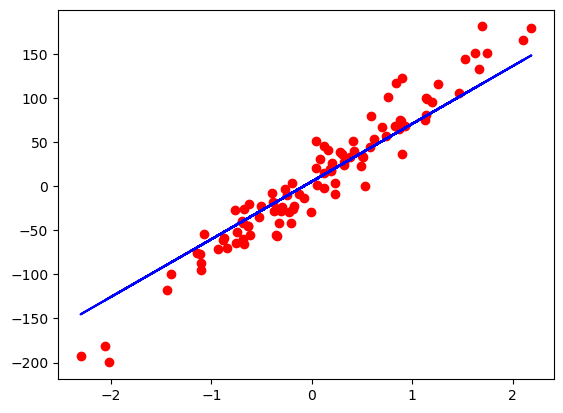

In [45]:
# Linear Regression in PyTorch 

import torch
import torch.nn as nn 
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt 

# prepare data 
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # reshape the tensor

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
n_iters = 100
for epoch in range(n_iters):
    # forward pass
    y_pred = model(X)
    
    # calc loss
    l = criterion(y_pred, y)
    
    # gradients = backward pass
    l.backward() #dl/dw
    
    # backward pass
    optimizer.step()
    
    # update gradients to 0
    optimizer.zero_grad()
    
    if epoch%10==0:
        [w,b] = model.parameters()
        print(f'epoch: {epoch+1}, loss: {l:.3f}, weights: {w[0][0].item():.3f}')
        
# plot
predicted = model(X).detach().numpy() 
# detach() method generates a new tensor where gradient calc is set to False
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

### Logistic Regression in PyTorch

In [8]:
# Logistic Regression in PyTorch

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale (always recommended to do for logistic regression)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1) # reshape
y_test = y_test.view(y_test.shape[0],1) # reshape

# define model 
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    
    def __init__(self, n_inputs):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
n_iters = 10
for epoch in range(n_iters):
    # forward pass
    y_pred = model(X_train)
    
    # calc loss
    l = criterion(y_pred, y_train)
    
    # backward pass
    l.backward()
    
    # update weights 
    optimizer.step()
    
    optimizer.zero_grad()
    
    if epoch%1==0:
        print(f'epoch: {epoch+1}, loss: {l:.3f}')
        
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc:.4f}')

epoch: 1, loss: 0.667
epoch: 2, loss: 0.648
epoch: 3, loss: 0.631
epoch: 4, loss: 0.614
epoch: 5, loss: 0.599
epoch: 6, loss: 0.584
epoch: 7, loss: 0.570
epoch: 8, loss: 0.557
epoch: 9, loss: 0.544
epoch: 10, loss: 0.533
accuracy: 0.8509


### Dataset and DataLoader in PyTorch (https://github.com/patrickloeber/pytorchTutorial/blob/master/09_dataloader.py)

In [6]:
# Dataset and DataLoader 
# https://github.com/patrickloeber/pytorchTutorial/blob/master/09_dataloader.py

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self):
        # Data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        # Dataset[index]
        return self.x[index], self.y[index]
    
    def __len__(self):
        # len(Dataset)
        return self.n_samples
    
dataset = WineDataset()
#first_data = dataset[0]
#features, labels = first_data
#print(features, labels)

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)

dataiter = iter(dataloader) # converting DataLoader to an iterator
data = next(dataiter)
features, labels = data
print(features, labels)

# dummy training loop
num_epochs = 2
total_samples = len(dataset)
n_iters = math.ceil(total_samples/4)
print(total_samples, n_iters)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward pass, backward pass, update weights
        if (i+1)%5==0:
            print(f'epoch: {epoch+1}/ {num_epochs}, step: {i+1}/ {n_iters}, inputs: {inputs.shape}')
            
#torchvision.datasets.MNIST()

tensor([[1.2990e+01, 1.6700e+00, 2.6000e+00, 3.0000e+01, 1.3900e+02, 3.3000e+00,
         2.8900e+00, 2.1000e-01, 1.9600e+00, 3.3500e+00, 1.3100e+00, 3.5000e+00,
         9.8500e+02],
        [1.2600e+01, 2.4600e+00, 2.2000e+00, 1.8500e+01, 9.4000e+01, 1.6200e+00,
         6.6000e-01, 6.3000e-01, 9.4000e-01, 7.1000e+00, 7.3000e-01, 1.5800e+00,
         6.9500e+02],
        [1.3500e+01, 1.8100e+00, 2.6100e+00, 2.0000e+01, 9.6000e+01, 2.5300e+00,
         2.6100e+00, 2.8000e-01, 1.6600e+00, 3.5200e+00, 1.1200e+00, 3.8200e+00,
         8.4500e+02],
        [1.3560e+01, 1.7300e+00, 2.4600e+00, 2.0500e+01, 1.1600e+02, 2.9600e+00,
         2.7800e+00, 2.0000e-01, 2.4500e+00, 6.2500e+00, 9.8000e-01, 3.0300e+00,
         1.1200e+03]]) tensor([[2.],
        [3.],
        [1.],
        [1.]])
178 45
epoch: 1/ 2, step: 5/ 45, inputs: torch.Size([4, 13])
epoch: 1/ 2, step: 10/ 45, inputs: torch.Size([4, 13])
epoch: 1/ 2, step: 15/ 45, inputs: torch.Size([4, 13])
epoch: 1/ 2, step: 20/ 45, inputs: 

### Dataset transforms (https://github.com/patrickloeber/pytorchTutorial/blob/master/10_transformers.py)

In [11]:
# Dataset transforms
# https://github.com/patrickloeber/pytorchTutorial/blob/master/10_transformers.py

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self, transform=None):
        # Data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]] # n_samples, 1
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        # Dataset[index]
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        # len(Dataset)
        return self.n_samples
  

class ToTensor:
    
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
class MulTransform:
    
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets
        
dataset = WineDataset(transform = ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


### Softmax and Cross entropy

In [26]:
# Softmax and cross-entropy

import torch
import numpy as np
import torch.nn as nn

def softmax(x):
    return np.exp(x)/ np.sum(np.exp(x))

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print(f'softmax numpy: {outputs}')

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

def cross_entropy(actual, predicted):
    return -np.sum(actual * np.log(predicted))

Y = np.array([1,0,0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'loss 1 : {l1}')
print(f'loss 2 : {l2}')

loss = nn.CrossEntropyLoss()

Y = torch.tensor([2,0,1])
# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1,1.0,2.1], [2.0,1.0,0.1], [0.1,3.0,0.1]])
Y_pred_bad = torch.tensor([[2.1,1.0,0.1], [0.1,1.0,2.1], [0.1,3.0,0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

print(torch.max(Y_pred_good, 1))
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1, predictions2)

softmax numpy: [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])
loss 1 : 0.35667494393873245
loss 2 : 2.3025850929940455
0.3018244206905365
1.6241613626480103
torch.return_types.max(
values=tensor([2.1000, 2.0000, 3.0000]),
indices=tensor([2, 0, 1]))
tensor([2, 0, 1]) tensor([0, 2, 1])


### Feedforward neural network (https://www.youtube.com/watch?v=oPhxf2fXHkQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=13)

torch.Size([100, 1, 28, 28]) torch.Size([100])


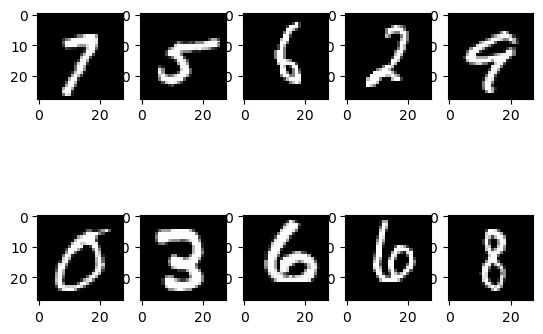

epoch: 2/ 2, step 100/ 600, loss 0.3501
epoch: 2/ 2, step 200/ 600, loss 0.2741
epoch: 2/ 2, step 300/ 600, loss 0.3193
epoch: 2/ 2, step 400/ 600, loss 0.2427
epoch: 2/ 2, step 500/ 600, loss 0.4421
epoch: 2/ 2, step 600/ 600, loss 0.1628
epoch: 2/ 2, step 100/ 600, loss 0.4826
epoch: 2/ 2, step 200/ 600, loss 0.2081
epoch: 2/ 2, step 300/ 600, loss 0.1685
epoch: 2/ 2, step 400/ 600, loss 0.2294
epoch: 2/ 2, step 500/ 600, loss 0.3428
epoch: 2/ 2, step 600/ 600, loss 0.2050
accuracy : 94.59


In [48]:
# MNIST
# Dataloader, Transformer
# Multilayer Neural Net, activation function 
# Loss and optimizer
# Training loop (batch training)
# Model evaluation 
# GPU support

import torch
import torchvision
import numpy as np
import torch.nn as nn
from sklearn import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters
input_size = 784 # 28x28
batch_size = 100
num_epochs = 2
num_classes = 10
hidden_units = 100
learning_rate = 0.001

# MNIST
trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

examples = iter(trainloader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

# Visualization
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(samples[i][0],cmap='gray')
plt.show()

# Multilayer Neural Net, activation function
class NeuralNetwork(nn.Module):
    
    def __init__(self, input_size, hidden_units, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.fc2 = nn.Linear(hidden_units, num_classes)
        
    def forward(self, x):
        out = torch.relu(self.fc1(x))
        out = self.fc2(out)
        return out
    
model = NeuralNetwork(input_size, hidden_units, num_classes)

# Loss and optimizer
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop (batch training)
n_total_steps = len(trainloader)
for i in range(num_epochs):
    for i, (samples, labels) in enumerate(trainloader):
        # 100 x 1 x 28 x 28 to 100 x 784
        samples = samples.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        y_pred = model(samples)
        
        # calc loss
        l = loss(y_pred, labels)
        
        # backward pass
        l.backward()
        
        # update weights
        optimizer.step()
        
        optimizer.zero_grad()
        
        if (i+1)%100==0:
            print(f'epoch: {epoch+1}/ {num_epochs}, step {i+1}/ {n_total_steps}, loss {l.item():.4f}')
            
# Model evaluation 
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for i, (images, labels) in enumerate(testloader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        y_pred = model(images)
        
        # value, index
        _, predictions = torch.max(y_pred, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100 * n_correct/ n_samples
    print(f'accuracy : {acc}')

### Tensorboard (https://www.youtube.com/watch?v=VJW9wU-1n18&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=16)

In [65]:
!pip install tensorboard

In [1]:
%load_ext tensorboard

In [75]:
!conda update --force conda -y



         See 'conda update --help' for details about the --force-reinstall
         and --clobber flags.


Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-arm64::jupyterlab_server==2.22.0=py311hca03da5_0
  - defaults/osx-arm64::dask-core==2023.6.0=py311hca03da5_0
  - defaults/osx-arm64::scikit-image==0.20.0=py311h313beb8_0
  - defaults/osx-arm64::sqlalchemy==2.0.25=py311h80987f9_0
  - defaults/noarch::requests-file==1.5.1=pyhd3eb1b0_0
  - defaults/osx-arm64::black==23.3.0=py311hca03da5_0
  - defaults/osx-arm64::bokeh==3.2.1=py311hb6e6a13_0
  - defaults/osx-arm64::_anaconda_depends==2023.09=py311_openblas_1
  - defaults/osx-arm64::anaconda-project==0.11.1=py311hca03da5_0
  - defaults/osx-arm64::python-lsp-black==1.2.1=py311hca03da5_0
  - defaults/osx-arm64::pyqt==5.15.7=py311h313beb8_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - conda-forge/osx-arm64::

 ... (more hidden) ...
libbrotlidec-1.0.9   | 29 KB     | ##################################### | 100% 



cssselect-1.2.0      | 50 KB     | ##################################### | 100% 



cssselect-1.2.0      | 50 KB     | ##################################### | 100% 

jupyterlab_pygments- | 19 KB     | ##################################### | 100% 

c-blosc2-2.12.0      | 266 KB    | ###################9                  |  54% 


c-blosc2-2.12.0      | 266 KB    | ##################################### | 100% 





gtest-1.14.0         | 390 KB    | #5                                    |   4% 




coloredlogs-15.0.1   | 82 KB     | #######2                              |  20% 






openpyxl-3.1.5       | 702 KB    | 8                                     |   2% 







jsonschema-specifica | 17 KB     | ###################################5  |  96% 







jsonschema-specifica | 17 KB     | ##################################### | 100% 





gtest-1.14.0         | 390 KB    | #######

 ... (more hidden) ...






















                                                                                
                                                                                

                                                                                


                                                                                



                                                                                




                                                                                





                                                                                






                                                                                







                                                                                








                                                                                









                                                                                










         

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [76]:
!conda install -c conda-forge werkzeug -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-arm64::jupyterlab_server==2.22.0=py311hca03da5_0
  - defaults/osx-arm64::sqlalchemy==2.0.25=py311h80987f9_0
  - defaults/osx-arm64::tokenizers==0.19.1=py311he19d34d_0
  - defaults/osx-arm64::_anaconda_depends==2023.09=py311_openblas_1
  - defaults/noarch::argon2-cffi==21.3.0=pyhd3eb1b0_0
  - defaults/osx-arm64::notebook==6.5.4=py311hca03da5_1
  - defaults/osx-arm64::jupyter_server_ydoc==0.8.0=py311hca03da5_1
  - defaults/osx-arm64::jupyterlab==3.6.3=py311hca03da5_0
  - defaults/osx-arm64::s3fs==2023.4.0=py311hca03da5_0
  - defaults/osx-arm64::datasets==2.12.0=py311hca03da5_0
  - defaults/osx-arm64::anaconda-navigator==2.5.0=py311hca03da5_0
  - defaults/osx-arm64::notebook-shim==0.2.2=py311hca03da5_0
  - defaults/osx-arm64::jupyter_server==1.23.4=py311hca03da5_0
  - defaults/osx-arm64::huggingface_hub==0.23.1=py311hca03d

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch: 1/ 2, step 100/ 600, loss 0.4824
epoch: 1/ 2, step 200/ 600, loss 0.4460
epoch: 1/ 2, step 300/ 600, loss 0.3095
epoch: 1/ 2, step 400/ 600, loss 0.2466
epoch: 1/ 2, step 500/ 600, loss 0.2010
epoch: 1/ 2, step 600/ 600, loss 0.3258
epoch: 2/ 2, step 100/ 600, loss 0.1918
epoch: 2/ 2, step 200/ 600, loss 0.1786
epoch: 2/ 2, step 300/ 600, loss 0.1597
epoch: 2/ 2, step 400/ 600, loss 0.2443
epoch: 2/ 2, step 500/ 600, loss 0.3359
epoch: 2/ 2, step 600/ 600, loss 0.0871
++++ torch.Size([10000, 10])
+++++ torch.Size([10000])
accuracy : 95.47


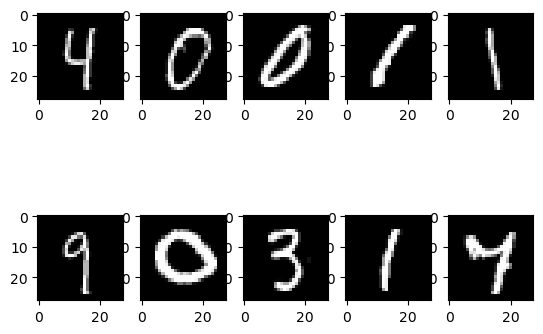

In [13]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
from sklearn import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

############################# TENSORBOARD ##########################################
from torch.utils.data import DataLoader, Dataset
import sys

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('logs/mnist1')
############################# TENSORBOARD ##########################################

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters
input_size = 784 # 28x28
batch_size = 100
num_epochs = 2
num_classes = 10
hidden_units = 100
learning_rate = 0.001

# MNIST
trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

examples = iter(trainloader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

# Visualization
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(samples[i][0],cmap='gray')
#plt.show()

############################# TENSORBOARD ##########################################
img_grid = torchvision.utils.make_grid(samples)
writer.add_image('mnist_images',img_grid)
#writer.close()
#sys.exit()
############################# TENSORBOARD ##########################################

# Multilayer Neural Net, activation function
class NeuralNetwork(nn.Module):
    
    def __init__(self, input_size, hidden_units, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.fc2 = nn.Linear(hidden_units, num_classes)
        
    def forward(self, x):
        out = torch.relu(self.fc1(x))
        out = self.fc2(out)
        # no activation and no softmax at the end
        return out
    
model = NeuralNetwork(input_size, hidden_units, num_classes)

# Loss and optimizer
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

############################# TENSORBOARD ##########################################
writer.add_graph(model, samples.reshape(-1, 28*28))
#writer.close()
############################# TENSORBOARD ##########################################

# Training loop (batch training)
n_total_steps = len(trainloader)
running_loss, running_correct = 0.0, 0

for epoch in range(num_epochs):
    for i, (samples, labels) in enumerate(trainloader):
        # 100 x 1 x 28 x 28 to 100 x 784
        samples = samples.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        y_pred = model(samples)
        
        # calc loss
        l = loss(y_pred, labels)
        
        # backward pass
        l.backward()
        
        # update weights
        optimizer.step()
        
        optimizer.zero_grad()
        
        running_loss += l.item()
        _, predictions = torch.max(y_pred, 1)
        running_correct += (predictions==labels).sum().item()
        
        if (i+1)%100==0:
            print(f'epoch: {epoch+1}/ {num_epochs}, step {i+1}/ {n_total_steps}, loss {l.item():.4f}')
            
            ############################# TENSORBOARD ##########################################
            writer.add_scalar('training loss', running_loss/100, epoch*n_total_steps+i)
            running_accuracy = running_correct / 100 / predictions.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch*n_total_steps+i)
            running_loss = 0.0
            running_correct = 0
            ############################# TENSORBOARD ##########################################
            
# Model evaluation 
labels = []
preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for i, (images, labels1) in enumerate(testloader):
        images = images.reshape(-1, 28*28).to(device)
        labels1 = labels1.to(device)
        
        y_pred = model(images)
        
        # value, index
        _, predictions = torch.max(y_pred, 1)
        n_samples += labels1.shape[0]
        n_correct += (predictions == labels1).sum().item()
        
        class_predictions = [F.softmax(output, dim=0) for output in y_pred]
        preds.append(class_predictions)
        labels.append(predictions)
        
    preds = torch.cat([torch.stack(batch) for batch in preds])    
    labels = torch.cat(labels)
    print('++++', preds.shape)
    print('+++++', labels.shape)
        
    acc = 100 * n_correct/ n_samples
    print(f'accuracy : {acc}')
    
    classes = range(10)
    for i in classes:
        labels_i = labels == i
        preds_i = preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()

In [14]:
%tensorboard --logdir=logs

Reusing TensorBoard on port 6007 (pid 36649), started 0:13:02 ago. (Use '!kill 36649' to kill it.)

### Convolutional Neural Network (https://www.youtube.com/watch?v=pDdP0TFzsoQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=14)

Files already downloaded and verified
Files already downloaded and verified
torch.Size([4, 3, 32, 32]) torch.Size([4])


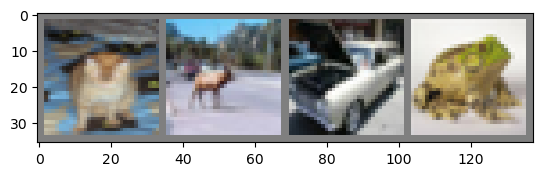

epoch 1/ 4, step 1/12500, loss 2.3258
epoch 1/ 4, step 2001/12500, loss 1.4919
epoch 1/ 4, step 4001/12500, loss 1.0148
epoch 1/ 4, step 6001/12500, loss 1.1393
epoch 1/ 4, step 8001/12500, loss 1.8709
epoch 1/ 4, step 10001/12500, loss 2.0978
epoch 1/ 4, step 12001/12500, loss 0.6572
epoch 2/ 4, step 1/12500, loss 2.1632
epoch 2/ 4, step 2001/12500, loss 1.6172
epoch 2/ 4, step 4001/12500, loss 1.8964
epoch 2/ 4, step 6001/12500, loss 1.3731
epoch 2/ 4, step 8001/12500, loss 0.8510
epoch 2/ 4, step 10001/12500, loss 0.8822
epoch 2/ 4, step 12001/12500, loss 1.0662
epoch 3/ 4, step 1/12500, loss 1.6474
epoch 3/ 4, step 2001/12500, loss 1.5081
epoch 3/ 4, step 4001/12500, loss 0.5575
epoch 3/ 4, step 6001/12500, loss 3.0259
epoch 3/ 4, step 8001/12500, loss 0.8663
epoch 3/ 4, step 10001/12500, loss 1.4973
epoch 3/ 4, step 12001/12500, loss 1.6984
epoch 4/ 4, step 1/12500, loss 0.7347
epoch 4/ 4, step 2001/12500, loss 1.5406
epoch 4/ 4, step 4001/12500, loss 0.4939
epoch 4/ 4, step 6001/

In [64]:
# Convolutional Neural Network

import torchvision
import torch.nn as nn
from sklearn import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters
num_classes = 10
num_epochs = 4
learning_rate = 0.001
batch_size = 4

# CIFAR-10
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms)
testloader = DataLoader(testset, batch_size = batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataset = iter(trainloader)
samples, labels = next(dataset)
print(samples.shape, labels.shape)

# Visualization
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
imshow(torchvision.utils.make_grid(samples))

# CNN 
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
model = CNN().to(device)

# Loss and Optimizer
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
n_total_steps = len(trainloader)
for epoch in range(num_epochs):
    for i, (samples, labels) in enumerate(trainloader):
        # origin shape - [4,3,32,32] = 4,3,1024
        # input_layer : 3 input channels, 6 output channels, 5 kernel size
        samples = samples.to(device)
        labels = labels.to(device)
        
        # forward pass
        y_pred = model(samples)
        
        # calc loss
        l = loss(y_pred, labels)
        
        # backward loss
        l.backward()
        
        # update weights
        optimizer.step()
        
        optimizer.zero_grad()
        
        if (i%2000)==0:
            print(f'epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss {l.item():.4f}')

# Model evaluation
with torch.no_grad():
    n_samples, n_correct = 0, 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for samples, labels in testloader:
        samples = samples.to(device)
        labels = labels.to(device)

        y_pred = model(samples)

        # value, index
        _, predictions = torch.max(y_pred, 1)
        n_samples += samples.shape[0]
        n_correct += (predictions == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predictions[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100 * n_correct/ n_samples
    print(f'accuracy {acc}')
    
    for i in range(10):
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of {classes[i]}: {acc} %')